# Applied Neural Networks Mid-Project
Katherine Wilsdon

Due Tuesday 11am, March 31, 2020

Set up imports and download [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

TensorFlow 2.x selected.
170500096/170498071 [==============================] - 4s 0us/step


**Question 1**<br/>
Explore and preprocess the CIFAR-10 datset. There should be 50 000 images in your training set and 10 000 images in your testing set. Each image is 32x32 pixels and each pixel has an RGB 3-vector. There are ten different classes.

In [2]:
X_train.shape

(50000, 32, 32, 3)

In [3]:
y_train.shape

(50000, 1)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_test.shape

(10000, 1)

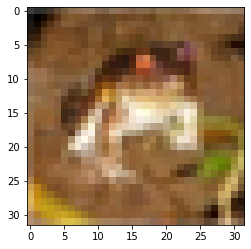

In [6]:
plt.imshow(X_train[0], cmap="binary")

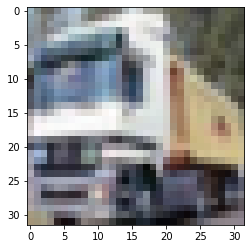

In [7]:
plt.imshow(X_train[1], cmap="binary")

In [8]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [0]:
# 0. Preprocess data
# Only execute this cell once!
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [11]:
X_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [12]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

In [13]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

In [14]:
# Create validation set of 5000 images
from sklearn.model_selection import train_test_split
X_train_tr, X_train_v, y_train_tr, y_train_v = train_test_split(X_train,
                                                                y_train,
                                                                test_size=.10,
                                                                random_state=42)
X_train_tr.shape

(45000, 32, 32, 3)

In [15]:
X_train_v.shape

(5000, 32, 32, 3)

**Question 2**<br/>
Train an ANN with 4 hidden layers of 500 neurons each. Use an early stopping callback with a patience of 10 epochs. Show the model summary and architecture plot. Give the accuracy. Make sure to train the network on validation data and reserve your test data for evaluation. Plot the accuracy vs epoch. 

*Hint:* you might find <br/>
keras.layers.Flatten(input_shape=(32, 32, 3)) <br/>
useful as it will flatten your input without you needing to reshape the data


In [0]:
# Create model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))
model.add(keras.layers.Dense(500, activation='relu', name='First_Hidden_Layer'))
model.add(keras.layers.Dense(500, activation='relu', name='Second_Hidden_Layer'))
model.add(keras.layers.Dense(500, activation='relu', name='Third_Hidden_Layer'))
model.add(keras.layers.Dense(500, activation='relu', name='Fourth_Hidden_Layer'))
model.add(keras.layers.Dense(10,activation="softmax",name="Output_Layer"))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
First_Hidden_Layer (Dense)   (None, 500)               1536500   
_________________________________________________________________
Second_Hidden_Layer (Dense)  (None, 500)               250500    
_________________________________________________________________
Third_Hidden_Layer (Dense)   (None, 500)               250500    
_________________________________________________________________
Fourth_Hidden_Layer (Dense)  (None, 500)               250500    
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                5010      
Total params: 2,293,010
Trainable params: 2,293,010
Non-trainable params: 0
______________________________________________

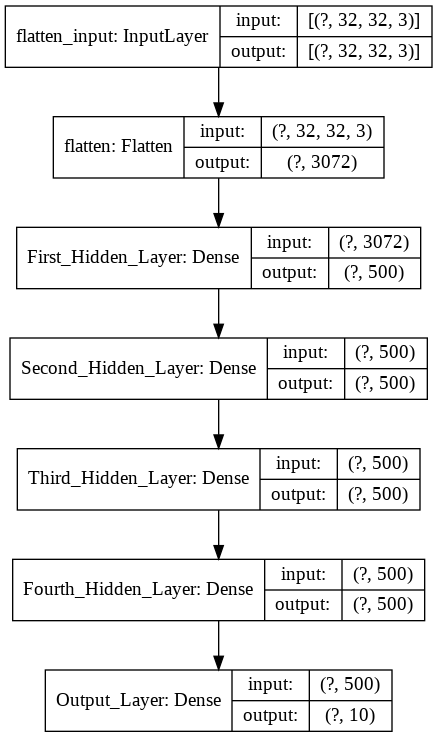

In [0]:
import graphviz
keras.utils.plot_model(model,show_shapes=True)

In [0]:
# 2. Compile model
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["accuracy"])
# 3. Fit (ie learn) on data
checkpoint_cb = keras.callbacks.ModelCheckpoint("model_ann.tf", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, verbose=1)
history_ann = model.fit(X_train_tr, y_train_tr, epochs=1000, validation_data=(X_train_v, y_train_v), callbacks=[checkpoint_cb, early_stopping_cb])

Train on 45000 samples, validate on 5000 samples
Epoch 1/1000
44736/45000 [============================>.] - ETA: 0s - loss: 2.1608 - accuracy: 0.2353WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/ops/resource_variable_ops.py:1786: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model_ann.tf/assets
45000/45000 [==============================] - 7s 160us/sample - loss: 2.1600 - accuracy: 0.2357 - val_loss: 2.0479 - val_accuracy: 0.2838
Epoch 2/1000
45000/45000 [==============================] - 5s 110us/sample - loss: 1.9672 - accuracy: 0.3101 - val_loss: 1.9305 - val_accuracy: 0.3178
Epoch 3/1000
45000/45000 [==============================] - 5s 109us/sample - loss: 1.8788 - accuracy: 0.3377 - val_loss: 1.8659 - val_accurac

In [0]:
# 3+. Evaluate 
test = model.evaluate(X_test[:,:], y_test)
test

10000/10000 [==============================] - 1s 70us/sample - loss: 1.3929 - accuracy: 0.5051


[1.3929188207626342, 0.5051]

The accuracy of the ANN model with 4 hidden layers, 500 neurons each, learning rate 1e-3 was 50.51%. I orginially did not use the model checkpoint and the accuracy was lower at around 47%.

Text(0.5, 1.0, 'ANN with 4 Hidden Layers of 500 Neurons Each')

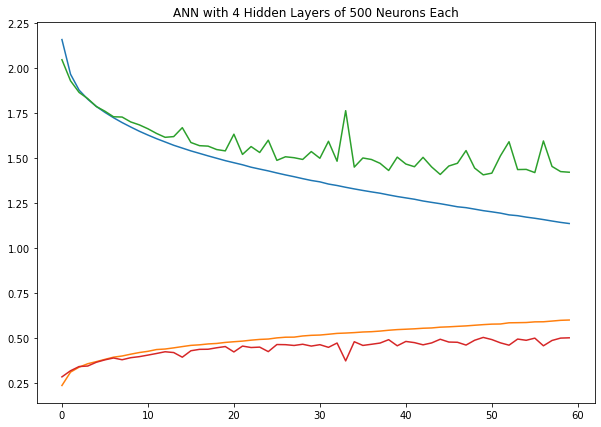

In [0]:
plt.plot(pd.DataFrame(history_ann.history))
plt.gcf().set_size_inches(10,7)
plt.title("ANN with 4 Hidden Layers of 500 Neurons Each")

**Question 3**<br/>
Use RandomizedSearchCV to tune your hyperparameters (you will need to use the Subclassing API). Check the following parameters: <br/>
number of hidden layers = [2, 4, 6, 8, 10] <br/>
number of neurons = [100, 400, 700, 1000, 1300] <br/>
learning rate = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2] <br/>

Which parameters performed best? Discuss.

In [0]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
def build_model(n_hidden, n_neurons, learning_rate):
  model = keras.models.Sequential()
  model.add(keras.layers.Flatten(input_shape=[32,32,3]))
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation='relu'))
  model.add(keras.layers.Dense(10, activation="softmax"))
  model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=learning_rate), metrics=["accuracy"])
  return model

In [0]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [0]:
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [2, 4, 6, 8, 10],
    "n_neurons": [100, 400, 700, 1000, 1300],
    "learning_rate": [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
}

In [0]:
%%time
checkpoint_cb = keras.callbacks.ModelCheckpoint("model_rand_search_cv.tf", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, verbose=1)
rand_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=25, cv=3, verbose=1)
rand_search_cv.fit(X_train_tr, y_train_tr, epochs=100, validation_data=(X_train_v, y_train_v), callbacks=[checkpoint_cb, early_stopping_cb])

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Streaming output truncated to the last 5000 lines.
Epoch 77/100
30000/30000 [==============================] - 3s 104us/sample - loss: 1.4979 - accuracy: 0.4661 - val_loss: 1.5665 - val_accuracy: 0.4372
Epoch 78/100
30000/30000 [==============================] - 3s 106us/sample - loss: 1.4939 - accuracy: 0.4691 - val_loss: 1.5644 - val_accuracy: 0.4334
Epoch 79/100
30000/30000 [==============================] - 3s 107us/sample - loss: 1.4892 - accuracy: 0.4694 - val_loss: 1.5899 - val_accuracy: 0.4262
Epoch 80/100
30000/30000 [==============================] - 3s 101us/sample - loss: 1.4846 - accuracy: 0.4724 - val_loss: 1.5610 - val_accuracy: 0.4360
Epoch 81/100
30000/30000 [==============================] - 3s 102us/sample - loss: 1.4812 - accuracy: 0.4736 - val_loss: 1.5563 - val_accuracy: 0.4378
Epoch 82/100
30000/30000 [==============================] - 3s 101us/sample - loss: 1.4774 - accuracy: 0.4755 - val_loss: 1.5579 - val_accuracy: 0.4386
Epoch 83/100
30000/30000 [===========

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 251.7min finished


Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 4s 97us/sample - loss: 1.9336 - accuracy: 0.3182 - val_loss: 1.8560 - val_accuracy: 0.3424
Epoch 2/100
45000/45000 [==============================] - 4s 90us/sample - loss: 1.7709 - accuracy: 0.3801 - val_loss: 1.8179 - val_accuracy: 0.3584
Epoch 3/100
45000/45000 [==============================] - 4s 88us/sample - loss: 1.7000 - accuracy: 0.4069 - val_loss: 1.7344 - val_accuracy: 0.3736
Epoch 4/100
45000/45000 [==============================] - 4s 89us/sample - loss: 1.6498 - accuracy: 0.4242 - val_loss: 1.6999 - val_accuracy: 0.3892
Epoch 5/100
45000/45000 [==============================] - 4s 90us/sample - loss: 1.6065 - accuracy: 0.4404 - val_loss: 1.6386 - val_accuracy: 0.4196
Epoch 6/100
45000/45000 [==============================] - 4s 89us/sample - loss: 1.5734 - accuracy: 0.4515 - val_loss: 1.6148 - val_accuracy: 0.4322
Epoch 7/100
45000/45000 [==========================

In [0]:
rand_search_cv.best_params_

{'learning_rate': 0.003, 'n_hidden': 2, 'n_neurons': 1000}

In [0]:
rand_search_cv.best_score_

-1.360363313123915

In [0]:
rand_search_cv.best_estimator_

In [0]:
model_rand_search_cv = rand_search_cv.best_estimator_.model
model_rand_search_cv

In [0]:
test2 = model_rand_search_cv.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 66us/sample - loss: 1.3530 - accuracy: 0.5194


In [0]:
model_rand_search_cv = keras.models.load_model("model_rand_search_cv.tf") # rollback to best model
test3 = model_rand_search_cv.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 73us/sample - loss: 1.3488 - accuracy: 0.5264


The best parameters of the ANN using the RandomizedSearchCV was 2 hidden layers, 1000 neurons each, learning rate 3e-3. The best mean cross-validated score of the best_estimator was 1.36. The accuracy of this model was 51.94% or 52.64%. This model was saved into a zip file, which is included with the project. It took 6 hours and 25 minutes to complete the randomized search. Although it took a long time, the results aided in finding a better model by taking into account the number of neurons and the learning rate.

In [0]:
!zip -r ./rand_search_cv.zip ./model_rand_search_cv.tf
from google.colab import files
files.download("./rand_search_cv.zip")

  adding: model_rand_search_cv.tf/ (stored 0%)
  adding: model_rand_search_cv.tf/assets/ (stored 0%)
  adding: model_rand_search_cv.tf/variables/ (stored 0%)
  adding: model_rand_search_cv.tf/variables/variables.data-00001-of-00002 (deflated 8%)
  adding: model_rand_search_cv.tf/variables/variables.index (deflated 51%)
  adding: model_rand_search_cv.tf/variables/variables.data-00000-of-00002 (deflated 74%)
  adding: model_rand_search_cv.tf/saved_model.pb (deflated 89%)


**Question 4**<br/>
Do at least one more thing to change your neural network.<br/>
Describe the best neural network you found in this project. Include the plot of accuracy vs epoch, and plots of five typical misclassifications. Give the accuracy of this best model for each class (is it better/worse at classifying some classes?).

In [0]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
# Create model
new_model = keras.models.Sequential()
new_model.add(keras.layers.Flatten(input_shape=[32,32,3]))
new_model.add(keras.layers.Dense(900, activation='relu', name='First_Hidden_Layer'))
new_model.add(keras.layers.Dense(900, activation='relu', name='Second_Hidden_Layer'))
new_model.add(keras.layers.Dense(900, activation='relu', name='Third_Hidden_Layer'))
new_model.add(keras.layers.Dense(900, activation='relu', name='Fourth_Hidden_Layer'))
new_model.add(keras.layers.Dense(900, activation='relu', name='Fifth_Hidden_Layer'))
new_model.add(keras.layers.Dense(900, activation='relu', name='Sixth_Hidden_Layer'))
new_model.add(keras.layers.Dense(10,activation="softmax",name="Output_Layer"))

In [0]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
First_Hidden_Layer (Dense)   (None, 900)               2765700   
_________________________________________________________________
Second_Hidden_Layer (Dense)  (None, 900)               810900    
_________________________________________________________________
Third_Hidden_Layer (Dense)   (None, 900)               810900    
_________________________________________________________________
Fourth_Hidden_Layer (Dense)  (None, 900)               810900    
_________________________________________________________________
Fifth_Hidden_Layer (Dense)   (None, 900)               810900    
_________________________________________________________________
Sixth_Hidden_Layer (Dense)   (None, 900)               8

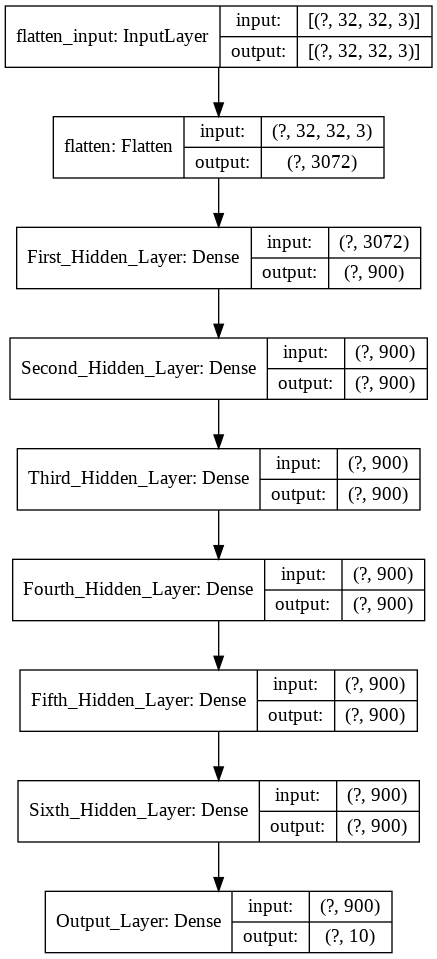

In [0]:
keras.utils.plot_model(new_model,show_shapes=True)

In [30]:
# 2. Compile model
new_model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=3e-3), metrics=["accuracy"])
# 3. Fit (ie learn) on data
checkpoint_cb = keras.callbacks.ModelCheckpoint("model_new_ann.tf", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, verbose=1)
history_new_ann = new_model.fit(X_train_tr, y_train_tr, epochs=1000, validation_data=(X_train_v, y_train_v), callbacks=[checkpoint_cb, early_stopping_cb])

Train on 45000 samples, validate on 5000 samples
Epoch 1/1000
45000/45000 [==============================] - 7s 151us/sample - loss: 2.0438 - accuracy: 0.2611 - val_loss: 1.9429 - val_accuracy: 0.3008
Epoch 2/1000
45000/45000 [==============================] - 6s 141us/sample - loss: 1.8159 - accuracy: 0.3505 - val_loss: 1.9255 - val_accuracy: 0.3212
Epoch 3/1000
45000/45000 [==============================] - 6s 140us/sample - loss: 1.7235 - accuracy: 0.3836 - val_loss: 1.7723 - val_accuracy: 0.3498
Epoch 4/1000
45000/45000 [==============================] - 6s 139us/sample - loss: 1.6596 - accuracy: 0.4099 - val_loss: 1.7219 - val_accuracy: 0.3704
Epoch 5/1000
45000/45000 [==============================] - 6s 141us/sample - loss: 1.6036 - accuracy: 0.4300 - val_loss: 1.6917 - val_accuracy: 0.3810
Epoch 6/1000
45000/45000 [==============================] - 6s 143us/sample - loss: 1.5603 - accuracy: 0.4444 - val_loss: 1.6407 - val_accuracy: 0.4148
Epoch 7/1000
45000/45000 [=============

In [46]:
# 3+. Evaluate 
test4 = new_model.evaluate(X_test[:,:], y_test)
test4

10000/10000 [==============================] - 1s 83us/sample - loss: 1.3549 - accuracy: 0.5277


[1.3548571304321289, 0.5277]

The best model was the ANN model with 6 hidden layers, 900 neurons each, and learning rate 3e-3. The accuracy of this model was 52.77% compared to 50.51% for the ANN with 4 hidden layers, 500 neurons each, and learning rate 1e-3 and 51.94%/52.64% for the ANN with 2 hidden layers, 1000 neurons each, and learning rate 3e-3 via the RandomizedSearchCV. The model checkpoint really made a difference in the accuracy, and none of the models would have as high of an accuracy without it.

Text(0.5, 1.0, 'ANN with 4 Hidden Layers vs ANN with 6 Hidden Layers')

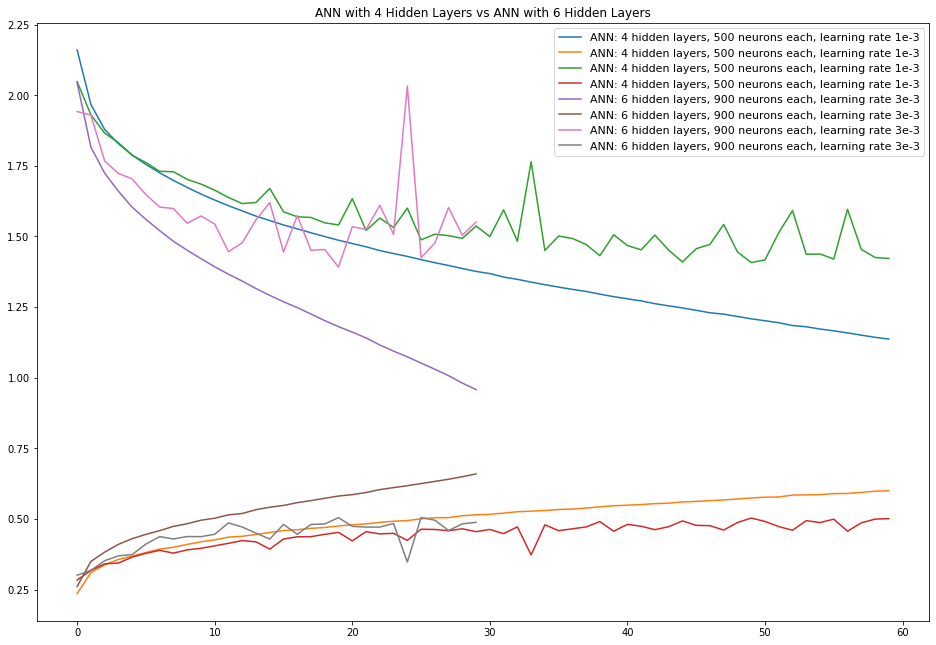

In [0]:
plt.plot(pd.DataFrame(history_ann.history), label='ANN: 4 hidden layers, 500 neurons each, learning rate 1e-3')
plt.plot(pd.DataFrame(history_new_ann.history), label='ANN: 6 hidden layers, 900 neurons each, learning rate 3e-3')
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size(size=11)
plt.legend(loc="best", prop=fontP)
plt.gcf().set_size_inches(16,11)
plt.title("ANN with 4 Hidden Layers vs ANN with 6 Hidden Layers")

In [32]:
y_pred = new_model.predict_classes(X_train)
y_pred

array([6, 1, 9, ..., 9, 1, 0])

In [0]:
y_misclassifications = np.where(y_train[:100] != y_pred[:100])

In [21]:
y_misclassifications[1][10]

12

In [22]:
np.shape(y_misclassifications)

(2, 8976)

Missclassified a truck as an automobile.


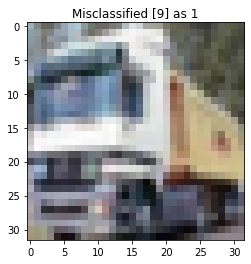

In [23]:
index = y_misclassifications[1][0].astype(int)
plt.imshow(X_train[index].reshape(32,32, 3), cmap='binary')
plt.title("Misclassified " + str(y_train[index]) + " as " + str(y_pred[index]))
print("Missclassified a truck as an automobile.")

Missclassified an automobile as a ship.


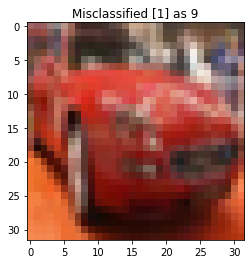

In [24]:
index = y_misclassifications[1][3].astype(int)
plt.imshow(X_train[index].reshape(32,32, 3), cmap='binary')
plt.title("Misclassified " + str(y_train[index]) + " as " + str(y_pred[index]))
print("Missclassified an automobile as a ship.")

Missclassified a cat as a horse.


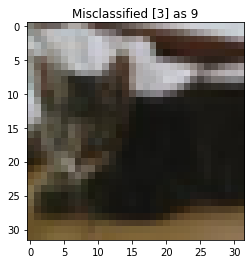

In [25]:
index = y_misclassifications[1][7].astype(int)
plt.imshow(X_train[index].reshape(32,32, 3), cmap='binary')
plt.title("Misclassified " + str(y_train[index]) + " as " + str(y_pred[index]))
print("Missclassified a cat as a horse.")

Missclassified a truck as a ship.


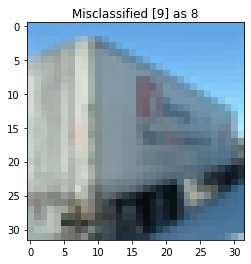

In [26]:
index = y_misclassifications[1][13].astype(int)
plt.imshow(X_train[index].reshape(32,32, 3), cmap='binary')
plt.title("Misclassified " + str(y_train[index]) + " as " + str(y_pred[index]))
print("Missclassified a truck as a ship.")

Missclassified a bird as a cat.


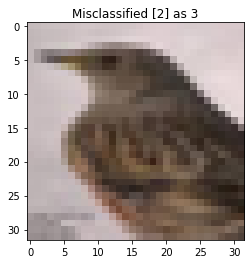

In [27]:
index = y_misclassifications[1][16].astype(int)
plt.imshow(X_train[index].reshape(32,32, 3), cmap='binary')
plt.title("Misclassified " + str(y_train[index]) + " as " + str(y_pred[index]))
print("Missclassified a bird as a cat.")

In [0]:
y_pred_test = new_model.predict_classes(X_test)

In [0]:
accuracy = np.zeros(10)
for i in range(10):
  for j in range(len(y_pred)):
    if y_pred[j] == y_train[j]:
      if y_pred[j] == i:
        accuracy[i] += 1
  #print("The training accuracy for class " + str(i) + " is : " + str(count/5000))

In [48]:
for i in range(10):
  for j in range(len(y_pred_test)):
    if y_pred_test[j] == y_test[j]:
      if y_pred_test[j] == i:
        accuracy[i] += 1
  print("The combined accuracy of the training and testing sets for class " + str(i) + " is : " + str(accuracy[i]/6000))

The combined accuracy of the training and testing sets for class 0 is : 0.6476666666666666
The combined accuracy of the training and testing sets for class 1 is : 0.7148333333333333
The combined accuracy of the training and testing sets for class 2 is : 0.5546666666666666
The combined accuracy of the training and testing sets for class 3 is : 0.2901666666666667
The combined accuracy of the training and testing sets for class 4 is : 0.5005
The combined accuracy of the training and testing sets for class 5 is : 0.42783333333333334
The combined accuracy of the training and testing sets for class 6 is : 0.6656666666666666
The combined accuracy of the training and testing sets for class 7 is : 0.7485
The combined accuracy of the training and testing sets for class 8 is : 0.6806666666666666
The combined accuracy of the training and testing sets for class 9 is : 0.5558333333333333


The ANN model with 6 hidden layers, 900 neurons each, and learning rate 3e-3 did better at correctly identifying some classes than others. The model was the worst at identifying cats (class 3) with an accuracy of 29.0%. The next worst misidentified class was dog images (class 5) at 42.8%. The ANN model was the best at classifying horses(class 7) and automobiles (class 1) at an accuracy of 74.9 % and 71.5%, respectively. The rest of the classes ranged in accuracy from 55% to 68%.

Note that convolution neural networks will be better predictors on this dataset than ANNs. We will revisit this in the final project (for undergraduates).